In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [17]:
import requests
import pandas as pd

def get_top_cryptos():
    # CoinGecko API 
    url = "https://api.coingecko.com/api/v3/coins/markets"
    
    params = {
        'vs_currency': 'usd',
        'order': 'market_cap_desc',  # Order by market capitalization
        'per_page': 50,  # Limit to top 50
        'page': 1,  # Get first page of results
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        cryptos = response.json()
        
        crypto_data = []
        
        for crypto in cryptos:
            data = {
                'Name': crypto['name'],
                'Symbol': crypto['symbol'],
                'Current Price (USD)': crypto['current_price'],
                'Market Capitalization': crypto['market_cap'],
                '24-hour Trading Volume': crypto['total_volume'],
                'Price Change (24h, %)': crypto['price_change_percentage_24h']
            }
            crypto_data.append(data)
        
        df = pd.DataFrame(crypto_data)
        return df
    else:
        print("Error fetching data:", response.status_code)
        return pd.DataFrame()

top_cryptos_df = get_top_cryptos()

In [20]:
top_cryptos_df.to_csv('top_cryptos1.csv', index=False)


In [21]:
# 1.Top 5 cryptocurrencies by market cap
top_5_by_market_cap = top_cryptos_df.nlargest(5, 'Market Capitalization')

print("Top 5 Cryptocurrencies by Market Capitalization:")
print(top_5_by_market_cap[['Name', 'Symbol', 'Market Capitalization']])



Top 5 Cryptocurrencies by Market Capitalization:
       Name Symbol  Market Capitalization
0   Bitcoin    btc          1941622399071
1  Ethereum    eth           418898054385
2    Tether   usdt           139186034980
3       XRP    xrp           130402454747
4       BNB    bnb           103110644665


In [22]:
# 2.Average price of the top 50 Cryptocurrencies
average_price = top_cryptos_df['Current Price (USD)'].mean()

print(f"Average Price of the Top 50 Cryptocurrencies: ${average_price:.2f}")

Average Price of the Top 50 Cryptocurrencies: $4334.01


In [23]:
# 3.Highest and lowest 24-hour percentage 
highest_price_change = top_cryptos_df.loc[top_cryptos_df['Price Change (24h, %)'].idxmax()]
lowest_price_change = top_cryptos_df.loc[top_cryptos_df['Price Change (24h, %)'].idxmin()]

In [24]:
#Highest 24-hour price Change
print("Highest 24-hour Price Change:")
print(f"Name: {highest_price_change['Name']} ({highest_price_change['Symbol']})")
print(f"Price Change (24h, %): {highest_price_change['Price Change (24h, %)']}%")

Highest 24-hour Price Change:
Name: Bitget Token (bgb)
Price Change (24h, %): 14.02897%


In [25]:
#Lowest 24-hour Price Change
print("Lowest 24-hour Price Change:")
print(f"Name: {lowest_price_change['Name']} ({lowest_price_change['Symbol']})")
print(f"Price Change (24h, %): {lowest_price_change['Price Change (24h, %)']}%")

Lowest 24-hour Price Change:
Name: Cronos (cro)
Price Change (24h, %): -1.5436%


In [28]:
# Market Cap vs. Price Analysis (Correlation)
correlation = top_cryptos_df[['Current Price (USD)', 'Market Capitalization']].corr()
print(f"Correlation between Price and Market Cap: \n{correlation}")


Correlation between Price and Market Cap: 
                       Current Price (USD)  Market Capitalization
Current Price (USD)               1.000000               0.679934
Market Capitalization             0.679934               1.000000


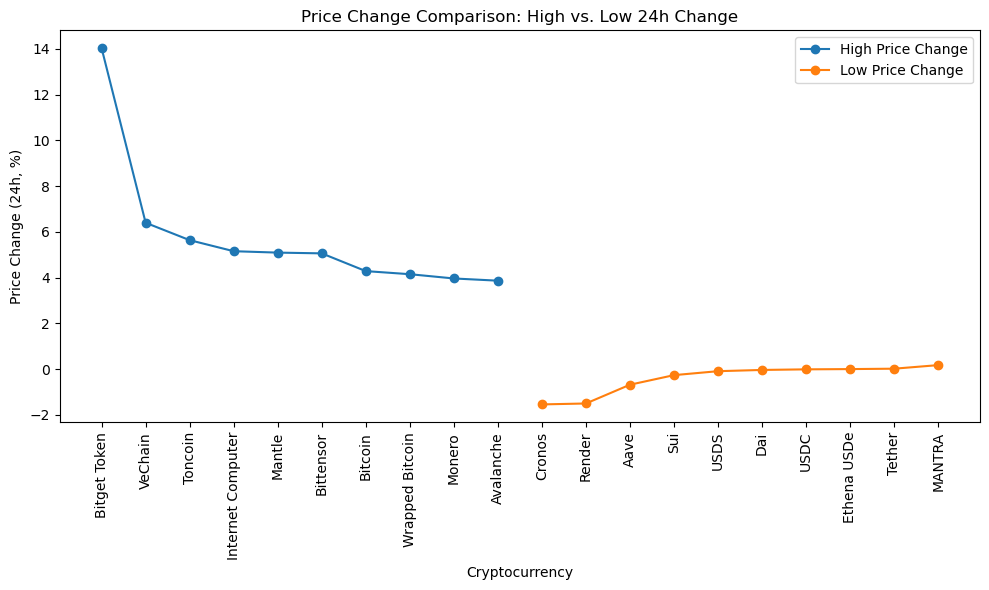

In [32]:
# Price Change Trend: High vs. Low Change
high_change = top_cryptos_df.nlargest(10, 'Price Change (24h, %)')
low_change = top_cryptos_df.nsmallest(10, 'Price Change (24h, %)')

# Plot comparison of price changes
plt.figure(figsize=(10, 6))
plt.plot(high_change['Name'], high_change['Price Change (24h, %)'], label='High Price Change', marker='o')
plt.plot(low_change['Name'], low_change['Price Change (24h, %)'], label='Low Price Change', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Cryptocurrency')
plt.ylabel('Price Change (24h, %)')
plt.title('Price Change Comparison: High vs. Low 24h Change')
plt.legend()
plt.tight_layout()
plt.show()


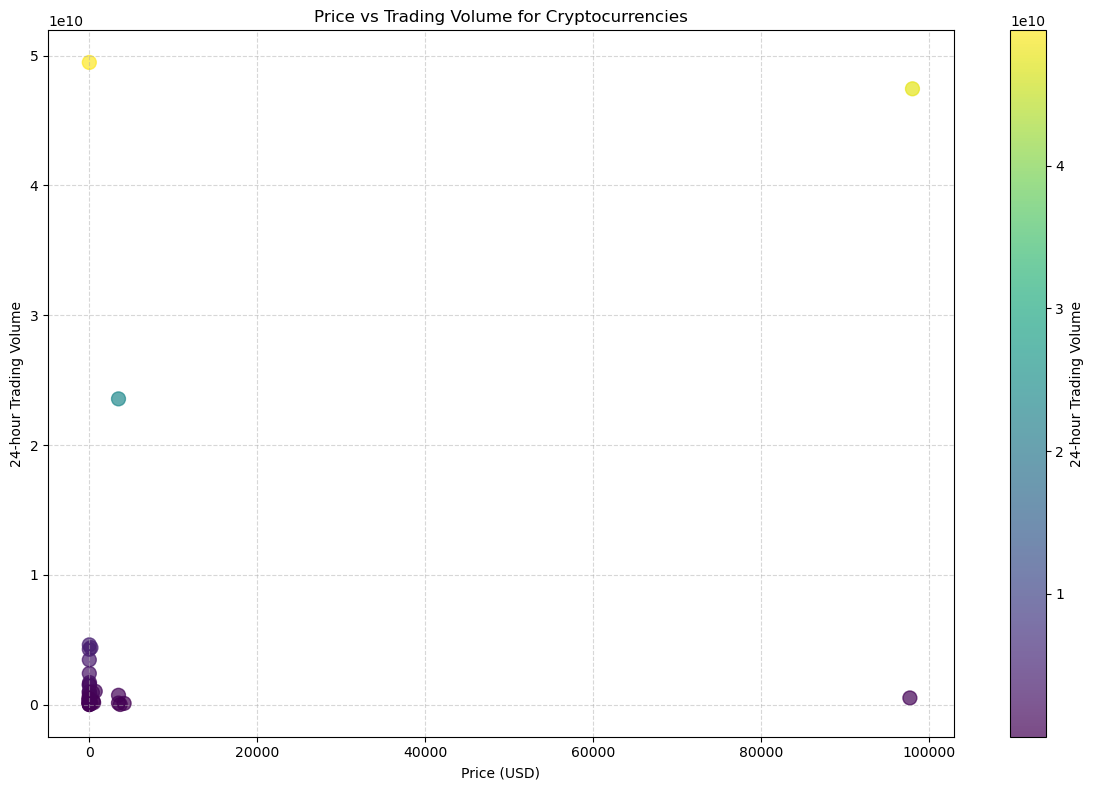

In [49]:
# Price vs Trading Volume for Cryptocurrencies
plt.figure(figsize=(12, 8))
plt.scatter(top_cryptos_df['Current Price (USD)'], 
            top_cryptos_df['24-hour Trading Volume'],
            c=top_cryptos_df['24-hour Trading Volume'], cmap='viridis', alpha=0.7, s=100)

plt.colorbar(label='24-hour Trading Volume')

plt.xlabel('Price (USD)')
plt.ylabel('24-hour Trading Volume')
plt.title('Price vs Trading Volume for Cryptocurrencies')

#gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()



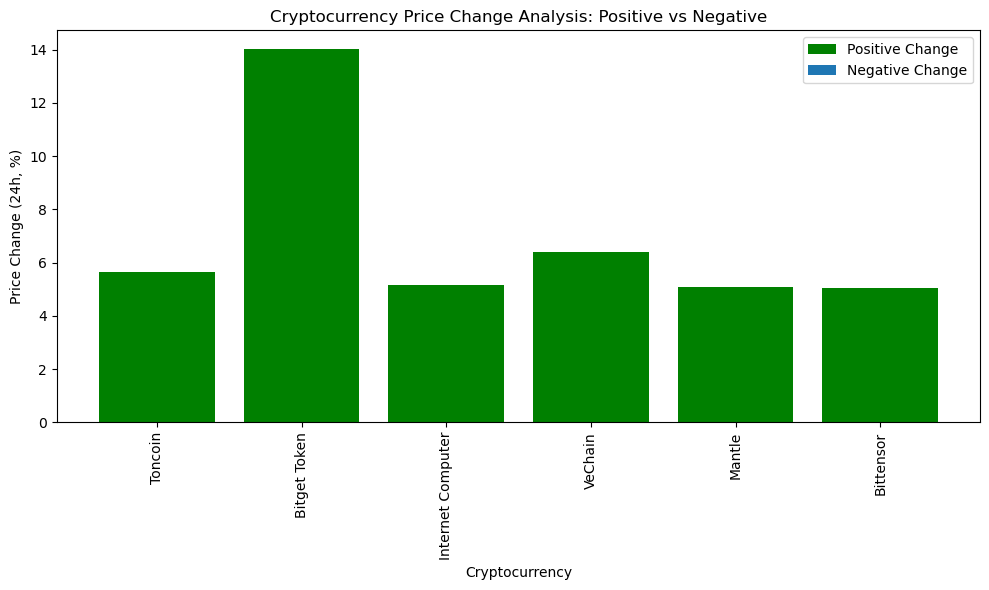

In [39]:
# Price Change Analysis: High Positive vs Negative Changes

high_positive_change = top_cryptos_df[top_cryptos_df['Price Change (24h, %)'] > 5]  # Coins with price change > 5%
high_negative_change = top_cryptos_df[top_cryptos_df['Price Change (24h, %)'] < -5]  # Coins with price change < -5%

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(high_positive_change['Name'], high_positive_change['Price Change (24h, %)'], color='green', label='Positive Change')
plt.bar(high_negative_change['Name'], high_negative_change['Price Change (24h, %)'], color='red', label='Negative Change')
plt.xticks(rotation=90)
plt.xlabel('Cryptocurrency')
plt.ylabel('Price Change (24h, %)')
plt.title('Cryptocurrency Price Change Analysis: Positive vs Negative')
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
# Cryptocurrencies with Stable Prices (Minimal Price Change)

stable_coins = top_cryptos_df[top_cryptos_df['Price Change (24h, %)'].abs() < 1]  # Filter coins with < 1% price change
print(stable_coins[['Name', 'Symbol', 'Price Change (24h, %)']])


            Name Symbol  Price Change (24h, %)
2         Tether   usdt                0.01773
7           USDC   usdc               -0.01116
16           Sui    sui               -0.26416
18        Hedera   hbar                0.74554
23  Bitcoin Cash    bch                0.54716
25       Uniswap    uni                0.29739
31   Ethena USDe   usde                0.00029
32          Aave   aave               -0.68270
34          USDS   usds               -0.09142
45        MANTRA     om                0.17349
47           Dai    dai               -0.03716
48      Arbitrum    arb                0.23723


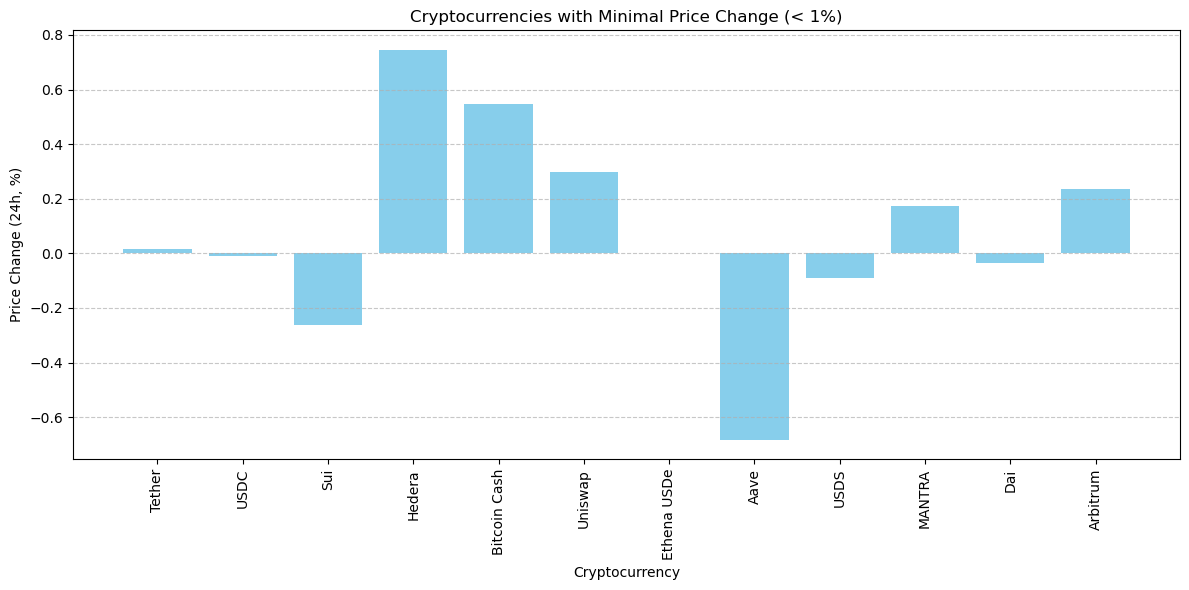

In [50]:
stable_coins = top_cryptos_df[top_cryptos_df['Price Change (24h, %)'].abs() < 1]

plt.figure(figsize=(12, 6))

plt.bar(stable_coins['Name'], stable_coins['Price Change (24h, %)'], color='skyblue')

plt.xlabel('Cryptocurrency')
plt.ylabel('Price Change (24h, %)')
plt.title('Cryptocurrencies with Minimal Price Change (< 1%)')

plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()